In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import re

In [26]:
# Import original data
print("loading data from file")
tweetsEPFL = pd.read_json('epfl_en.json')
tweetsETH = pd.read_json('eth_en.json')

loading data from file


In [27]:
# Downsampled data
print("downsampling tweets")
downsampledTweetsEPFL = tweetsEPFL[tweetsEPFL["id"] % 10 == 8]
downsampledTweetsETH = tweetsETH[tweetsETH["id"] % 10 == 8]

downsampling tweets


In [128]:
tweetsEPFL_test = tweetsEPFL.ix[:, ['created_at', 'favorite_count', 'id', 'retweet_count', 'text', 'entities']]

# Part 2

In [69]:
tweetsEPFL_test['Year'] = pd.DatetimeIndex(tweetsEPFL_test['created_at']).year
tweetsEPFL_test['Month'] = pd.DatetimeIndex(tweetsEPFL_test['created_at']).month
tweetsEPFL_test['Hour'] = pd.DatetimeIndex(tweetsEPFL_test['created_at']).hour
tweetsEPFL_test['Engagement'] = tweetsEPFL_test['favorite_count'] + tweetsEPFL_test['retweet_count']

In [94]:
tweetsETH_test = tweetsETH
tweetsETH_test['Year'] = pd.DatetimeIndex(tweetsETH_test['created_at']).year
tweetsETH_test['Month'] = pd.DatetimeIndex(tweetsETH_test['created_at']).month
tweetsETH_test['Hour'] = pd.DatetimeIndex(tweetsETH_test['created_at']).hour
tweetsETH_test['Engagement'] = tweetsETH_test['favorite_count'] + tweetsETH_test['retweet_count']
tweetsETH_test.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,retweeted,retweeted_status,source,text,truncated,user,Year,Month,Hour,Engagement
0,NaN,NaN,2017-01-27 17:00:13,{'urls': [{'display_url': 'ethz.ch/en/news-and...,NaN,1,False,NaN,825025633579212800,825025633579212800,...,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",From digitally designing to testing on the slo...,False,"{'follow_request_sent': False, 'friends_count'...",2017,1,17,1
1,NaN,NaN,2017-01-27 14:23:41,{'urls': [{'display_url': 'onlinelibrary.wiley...,NaN,0,False,NaN,824986239543738368,824986239543738368,...,False,"{'truncated': False, 'source': '<a href=""http:...","<a href=""http://www.falcon.io"" rel=""nofollow"">...",RT @materialsviews: Learn more on Microscale #...,False,"{'follow_request_sent': False, 'friends_count'...",2017,1,14,4
2,NaN,NaN,2017-01-26 14:56:07,"{'urls': [], 'symbols': [], 'hashtags': [], 'u...",NaN,0,False,NaN,824632013990793217,824632013990793216,...,False,"{'truncated': True, 'source': '<a href=""http:/...","<a href=""http://www.falcon.io"" rel=""nofollow"">...","RT @LudiciousFest: Severin Klingler, Ph.D. can...",False,"{'follow_request_sent': False, 'friends_count'...",2017,1,14,5
3,NaN,NaN,2017-01-26 12:08:32,"{'urls': [], 'symbols': [], 'hashtags': [{'ind...",NaN,0,False,NaN,824589837479149570,824589837479149568,...,False,"{'truncated': True, 'source': '<a href=""http:/...","<a href=""http://www.falcon.io"" rel=""nofollow"">...",RT @NatRevMCB: Now online Review by Ulrike Kut...,False,"{'follow_request_sent': False, 'friends_count'...",2017,1,12,27
4,NaN,NaN,2017-01-25 17:27:30,"{'urls': [{'display_url': 'bit.ly/2j9YNUi', 'i...",NaN,0,False,NaN,824307723814703106,824307723814703104,...,False,"{'truncated': True, 'source': '<a href=""http:/...","<a href=""http://twitter.com/download/android"" ...","RT @aaas: Experts from @MIT, @ETH_en and more ...",False,"{'follow_request_sent': False, 'friends_count'...",2017,1,17,5


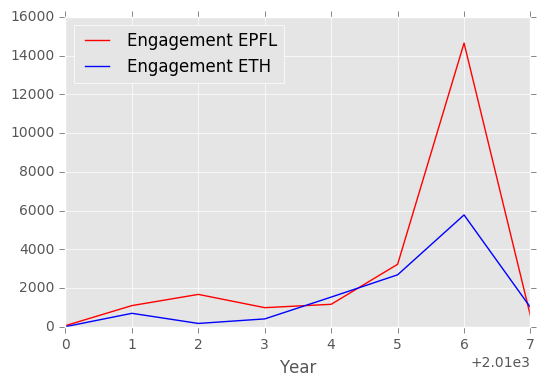

In [119]:
# Engagement Per Year:
tweetsEPLF_perYear = tweetsEPFL_test.groupby(['Year']).sum()[['Engagement']]
tweetsETH_perYear = tweetsETH_test.groupby(['Year']).sum()[['Engagement']]

plt.figure()
ax = tweetsEPLF_perYear.reset_index().plot(kind='line', x='Year', y='Engagement'
                                                 , color='Red', label='Engagement EPFL');
tweetsETH_perYear.reset_index().plot(kind='line', x = 'Year', y = 'Engagement'
                                          , color='Blue', label='Engagement ETH', ax=ax);
plt.show()

We can see that for both accounts EPFL and ETH the engagement (number of favorites and retweets) is more important 
every year. The growth is significant at 2016

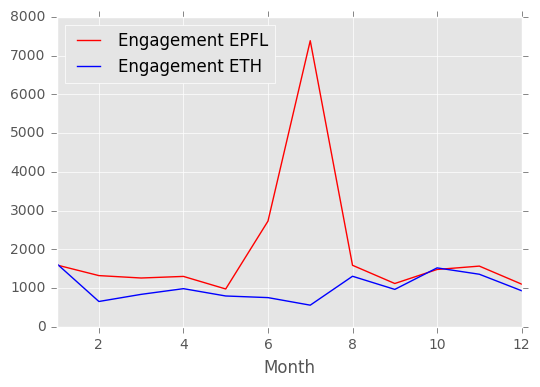

In [118]:
# Engagement Per Month:
tweetsEPLF_perMonth = tweetsEPFL_test.groupby(['Month']).sum()[['Engagement']]
tweetsETH_perMonth = tweetsETH_test.groupby(['Month']).sum()[['Engagement']]

plt.figure()
ax = tweetsEPLF_perMonth.reset_index().plot(kind='line', x='Month', y='Engagement'
                                                 , color='Red', label='Engagement EPFL');
tweetsETH_perMonth.reset_index().plot(kind='line', x = 'Month', y = 'Engagement'
                                          , color='Blue', label='Engagement ETH', ax=ax);
plt.show()

We can see that for the EPFL account we have a very high engagement during July, the end of the academic year.
For the ETH account, we don't have a difference between months.

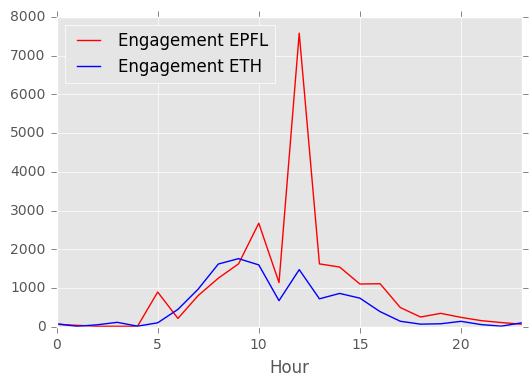

In [121]:
# Engagement Per Hour:
tweetsEPLF_perHour = tweetsEPFL_test.groupby(['Hour']).sum()[['Engagement']]
tweetsETH_perHour = tweetsETH_test.groupby(['Hour']).sum()[['Engagement']]

plt.figure()
ax = tweetsEPLF_perHour.reset_index().plot(kind='line', x='Hour', y='Engagement'
                                                 , color='Red', label='Engagement EPFL');
tweetsETH_perHour.reset_index().plot(kind='line', x = 'Hour', y = 'Engagement'
                                          , color='Blue', label='Engagement ETH', ax=ax);
plt.show()

We can see that tweets posted between 8am and 2pm get more attention. We note the high engagement at noon (lunch time) for the EPFL account 

In [153]:
hashtag = tweetsEPFL_test.text[3]
re.findall(r"#(\w+)", hashtag)

['Antarctic', 'climate']

# Part 3

'RT @TechnologistEU: Three months in the #Antarctic to unlock the secrets of our #climate https://t.co/VigQDicNSK https://t.co/2A242G28my'